In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Loaned From'],axis=1,inplace=True)


In [2]:
df[['Value','Wage']].head()

,Value,Wage
0,€110.5M,€565K
1,€77M,€405K
2,€118.5M,€290K
3,€72M,€260K
4,€102M,€355K


In [3]:
def konversi(a):
    try:
        value = float(a[1:-1])
        suffix = a[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value
df['Value'] = df['Value'].apply(konversi)
df['Wage'] = df['Wage'].apply(konversi)



In [4]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Grab data tiap liga dari MYSQL

In [5]:

import mysql.connector 
import csv

db = mysql.connector.connect(
    host ='localhost',
    user ='wildan',
    passwd='12345',
    database ='liga'
)

kursor=db.cursor()

data=[]
def getliga():
    query='select * from liga_inggris;'
    kursor.execute(query)
    hasil=kursor.fetchall()
    panjang=len(hasil)
    for i in range(panjang):
        isi={
            'posisi klasemen' : hasil[i][0],
            'klub' : hasil[i][1],
            'main' : hasil[i][2],
            'Goal Difference': hasil[i][3],
            'Point':hasil[i][4]
        }
        data.append(isi)

    return data


with open('inggris.csv','w',newline='') as fileku:
    kolom = ['posisi klasemen','klub','main','Goal Difference','Point']
    tulis = csv.DictWriter(fileku,fieldnames = kolom)
    tulis.writeheader() #cara untuk menulis header
    tulis.writerows(getliga())


In [6]:

import mysql.connector 
import csv

db = mysql.connector.connect(
    host ='localhost',
    user ='wildan',
    passwd='12345',
    database ='liga'
)

kursor=db.cursor()

data=[]
def getliga():
    query='select * from liga_italia;'
    kursor.execute(query)
    hasil=kursor.fetchall()
    panjang=len(hasil)
    for i in range(panjang):
        isi={
            'posisi klasemen' : hasil[i][0],
            'klub' : hasil[i][1],
            'main' : hasil[i][2],
            'Goal Difference': hasil[i][3],
            'Point':hasil[i][4]
        }
        data.append(isi)

    return data


with open('italia.csv','w',newline='') as fileku:
    kolom = ['posisi klasemen','klub','main','Goal Difference','Point']
    tulis = csv.DictWriter(fileku,fieldnames = kolom)
    tulis.writeheader() #cara untuk menulis header
    tulis.writerows(getliga())


In [7]:

import mysql.connector 
import csv

db = mysql.connector.connect(
    host ='localhost',
    user ='wildan',
    passwd='12345',
    database ='liga'
)

kursor=db.cursor()

data=[]
def getliga():
    query='select * from liga_spanyol;'
    kursor.execute(query)
    hasil=kursor.fetchall()
    panjang=len(hasil)
    for i in range(panjang):
        isi={
            'posisi klasemen' : hasil[i][0],
            'klub' : hasil[i][1],
            'main' : hasil[i][2],
            'Goal Difference': hasil[i][3],
            'Point':hasil[i][4]
        }
        data.append(isi)

    return data


with open('spanyol.csv','w',newline='') as fileku:
    kolom = ['posisi klasemen','klub','main','Goal Difference','Point']
    tulis = csv.DictWriter(fileku,fieldnames = kolom)
    tulis.writeheader() #cara untuk menulis header
    tulis.writerows(getliga())


In [8]:
import pandas as pd
df1 = pd.read_csv('inggris.csv')
df2 = pd.read_csv('spanyol.csv')
df3 = pd.read_csv('italia.csv')


Ubah kedalam list 


In [9]:
listinggris = df1['klub'].values.tolist()
listspanyol= df2['klub'].values.tolist()
listitalia= df3['klub'].values.tolist()

In [10]:
listinggris

['Manchester City',
 'Liverpool',
 'Tottenham Hotspur',
 'Arsenal',
 'Manchester United',
 'Chelsea',
 'Wolverhampton Wanderers',
 'Watford',
 'West Ham United',
 'Leicester City',
 'Everton',
 'AFC Bournemouth',
 'Newcastle United',
 'Crystal Palace',
 'Brighton & Hove Albion',
 'Southampton',
 'Burnley',
 'Cardiff City',
 'Fulham',
 'Huddersfield Town']

In [11]:
listallclub = df.Club.tolist()
ligainggris =['Liverpool','Manchester City','Tottenham Hotspur','Arsenal','Manchester United','Chelsea','Wolverhampton Wanderers','Watford','West Ham United',
'Leicester City','Everton','AFC Bournemouth','Newcastle United','Crystal Palace','Brighton & Hove Albion','Southampton','Burnley','Cardiff City','Fulham','Huddersfield Town']
ligaitalia =['Juventus','Napoli','Inter','Roma','Lazio','Atalanta','Torino','Sampdoria','Fiorentina','Parma','Genoa','Sassuolo','Cagliari','SPAL','Udinese','Empoli','Bologna','Frosinone','Chievo Verona']
ligaspanyol = ['FC Barcelona','Atlético Madrid','Real Madrid','Getafe CF','Deportivo Alavés','Sevilla FC','Valencia CF','Real Betis','Athletic Club de Bilbao','Real Sociedad','SD Eibar','Girona FC','RCD Espanyol','CD Leganés','Levante UD','Real Valladolid CF','Villarreal CF','Rayo Vallecano','SD Huesca']


melakukan pengecekan satu2 .apakah data yang di grab dari mongo DB itu memang ada di dataframe ASLI

In [12]:
for data in ligainggris:
    if data not in listallclub:
        print(data)

AFC Bournemouth


In [13]:
tidakmasuk1 = [data for data in ligainggris if data not in listallclub]

if tidakmasuk1:
    print("tidak semua elemen masuk, klubnya yg tidak masuk adalah",tidakmasuk1)
else :
    print("semua elemen masuk!")    

tidak semua elemen masuk, klubnya yg tidak masuk adalah ['AFC Bournemouth']


In [14]:
tidakmasuk2 = [data for data in ligaitalia if data not in listallclub]

if tidakmasuk2:
    print("tidak semua elemen masuk, klubnya yg tidak masuk adalah",tidakmasuk2)
else :
    print("semua elemen masuk!")    

semua elemen masuk!


In [15]:
tidakmasuk3 = [data for data in ligaspanyol if data not in listallclub]

if tidakmasuk3:
    print("tidak semua elemen masuk, klubnya yg tidak masuk adalah",tidakmasuk3)
else :
    print("semua elemen masuk!")    

semua elemen masuk!


melakukan filtering terhadap list tiap - tiap liga untuk mendapatkan pemain tiap liga dan melakukan ekstraksi fitur terhadap masing- masing liga diatas

Buat kolom baru dan isi default liga lain

In [16]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [17]:
df["Liga"]= "liga lain"

In [18]:

df["Liga"][df['Club'].isin(ligainggris)] = 'liga inggris'
df["Liga"][df['Club'].isin(ligaitalia)] = 'liga italia'
df["Liga"][df['Club'].isin(ligaspanyol)] = 'liga spanyol'


#df["Liga"][~(df['Club'].isin (ligaspanyol)&df['Club'].isin (ligainggris)&df['Club'].isin (ligaspanyol))] = 'liga lain'

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [19]:
df[0:100]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Liga
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,liga spanyol
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,liga italia
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,liga lain
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,liga inggris
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,liga inggris
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,liga inggris
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,liga spanyol
7,176580,L. S

In [20]:
dfligaspanyol = df[df['Liga']=="liga spanyol"]
dfligainggris = df[df['Liga']=="liga inggris"]
dfligaitalia= df[df['Liga']=="liga italia"]
dfligalain= df[df['Liga']=="liga lain"]

In [21]:
dfligaspanyol

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Liga
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,liga spanyol
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,liga spanyol
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,"Jul 11, 2014",2021,6'0,190lbs,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,79+5,79+5,79+5,84+5,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,liga spanyol
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",2020,6'0,181lbs,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,liga spanyol
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 16, 2014",2021,6'2,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,liga spanyol
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76500000.0,355000.0,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,8.0,"Jul 17, 2014",2022,6'0,168lbs,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M,liga spanyol
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,1946,Right,3.0,3.0,2.0,Medium/ High,Lean,Yes,CB,10.0,"Aug 4, 2010",2019,6'2,172lbs,64+3,64+3,64+3,61+3,62+3,62+3,62+3,61+3,62+3,62+3,62+3,63+3,68+3,68+3,68+3,63+3,76+3,81+3,81+3,81+3,76+3,79+3,87+3,87+3,87+3,79+3,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M,liga spanyol
17,194765,A. Grie

In [22]:
#gaji rata2 tiap liga
print("rata2 gaji di liga spanyol = ",dfligaspanyol.Wage.mean()) #dalam pounds
print(dfligaspanyol.Wage.head())
###################
print("rata2 gaji di liga inggris = ",dfligainggris.Wage.mean()) #dalam pounds
print(dfligainggris.Wage.head())
####################
print("rata2 gaji di liga italia = ",dfligaitalia.Wage.mean()) #dalam pounds
print(dfligaitalia.Wage.head())

rata2 gaji di liga spanyol =  35217.83876500858
0    565000.0
6    420000.0
7    455000.0
8    380000.0
9    94000.0 
Name: Wage, dtype: float64
rata2 gaji di liga inggris =  53499.18962722852
3     260000.0
4     355000.0
5     340000.0
13    285000.0
14    225000.0
Name: Wage, dtype: float64
rata2 gaji di liga italia =  32244.701348747592
1     405000.0
15    205000.0
24    215000.0
29    165000.0
40    110000.0
Name: Wage, dtype: float64


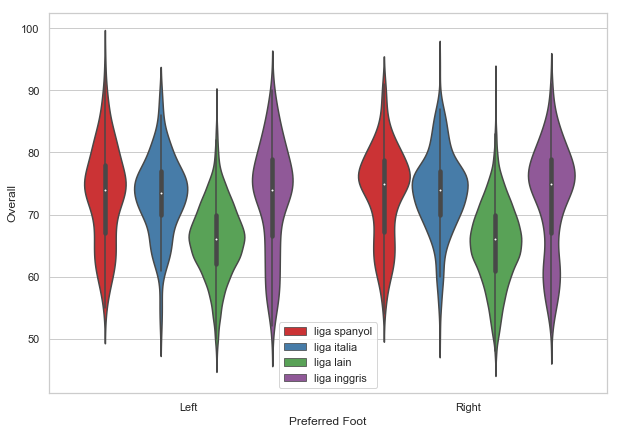

In [23]:
plt.figure(figsize=[10,7])
plt.rcParams['figure.figsize'] = (10,10)
sns.set(style="whitegrid")
g = sns.violinplot(x="Preferred Foot", y="Overall", data=df,hue='Liga',palette='Set1',legend=False)
plt.legend(loc='lower center')

penjelasan : Penjelasan : Liga spanyol dan liga inggris hampir setara. Pemain di liga spanyol dan liga inggris dominan di kaki kanan .

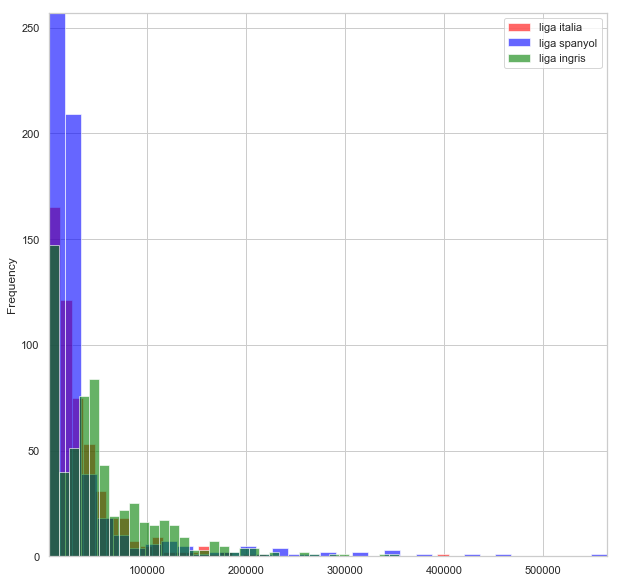

In [24]:
plt.rcParams['patch.force_edgecolor'] = True
plt.autoscale(enable=True, axis='both', tight=True)
#plt.figure(figsize=(10,6))
poli0= df[df['Liga']=='liga italia']['Wage']
poli1= df[df['Liga']=='liga spanyol']['Wage']
poli2= df[df['Liga']=='liga inggris']['Wage']

poli0.plot(x='Liga',kind='hist',bins=35,color='red',label='liga italia',alpha=0.6,legend=True)
poli1.plot(x='Liga',kind='hist',bins=35,color='blue',label='liga spanyol',alpha=0.6,legend=True)
poli2.plot(x='Liga',kind='hist',bins=35,color='green',label='liga ingris',alpha=0.6,legend=True)
plt.grid(True)
#poli0.plot(x='fico',kind='hist')

penjelasan : distribusi gaji di liga spanyol untuk gaji yang sedikit lebih banyak . timbang gaji lainnya. gaji di liga inggris distribusinya berada di area yang valuenya lebih banyak

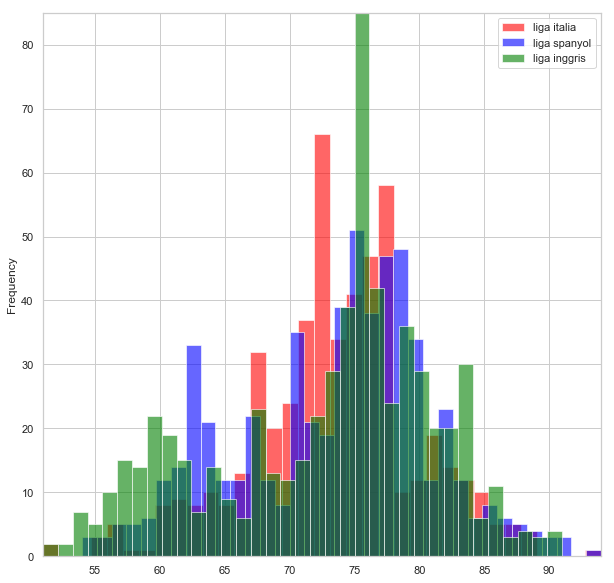

In [25]:
plt.rcParams['patch.force_edgecolor'] = True
plt.autoscale(enable=True, axis='both', tight=True)
#plt.figure(figsize=(10,6))
poli0= df[df['Liga']=='liga italia']['Overall']
poli1= df[df['Liga']=='liga spanyol']['Overall']
poli2= df[df['Liga']=='liga inggris']['Overall']

poli0.plot(x='Liga',kind='hist',bins=35,color='red',label='liga italia',alpha=0.6,legend=True)
poli1.plot(x='Liga',kind='hist',bins=35,color='blue',label='liga spanyol',alpha=0.6,legend=True)
poli2.plot(x='Liga',kind='hist',bins=35,color='green',label='liga inggris',alpha=0.6,legend=True)
plt.grid(True)
#poli0.plot(x='fico',kind='hist')

penjelasan : pemain inggris banyak yang kemampuannya dibawah 60 dan terbanyak di 76an, itali terbanyak di 73an , dan spanyol ada di 75an dan 80an

In [32]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
data = dict(
        type = 'choropleth',
        colorscale = 'Blues',
        reversescale = True,
        locations = dfligainggris['Nationality'],
        locationmode = "country names",
        z =  dfligainggris['Overall'],
        text =  dfligainggris['Name'],
        colorbar = {'title' : 'value'},
      ) 

layout = dict(title = 'Sebaran pemain inggris',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [33]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
data = dict(
        type = 'choropleth',
        colorscale = 'Electric',
        reversescale = True,
        locations = dfligaspanyol['Nationality'],
        locationmode = "country names",
        z =  dfligaspanyol['Overall'],
        text =  dfligaspanyol['Name'],
        colorbar = {'title' : 'value'},
      ) 

layout = dict(title = 'Sebaran pemain spanyol',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [31]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = dfligaitalia['Nationality'],
        locationmode = "country names",
        z =  dfligaitalia['Overall'],
        text =  dfligaitalia['Name'],
        colorbar = {'title' : 'value'},
      ) 

layout = dict(title = 'Sebaran pemain italia',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)